In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random as rnd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt





**QUESTION 1**

**Demonstrate the data preparation & feature extraction process**

*Demonstrated removing useless varaiables, EDA, imputation and encoding.*

In [160]:

 #Loading  the datasets
players_21 = pd.read_csv('/content/drive/MyDrive/players_21.csv')
players_22 = pd.read_csv('/content/drive/MyDrive/players_22.csv')


<ipython-input-160-033ac39bddc2>:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22 = pd.read_csv('/content/drive/MyDrive/players_22.csv')


In [161]:
players_21.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [162]:
players_22.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


Data Pre-processing

```



In [163]:
# Substring to remove
substring_to_remove = 'url'

# Remove columns with specified substring
players_21 = players_21[players_21.columns.drop(players_21.filter(like=substring_to_remove))]

# Check the shape of the DataFrame
print(players_21.shape)
players_21.head(5)


(18944, 104)


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,1985-02-05,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,188545,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,1988-08-21,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,1992-02-05,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [164]:
# Substring to remove
substring_to_remove = 'url'

# Remove columns with specified substring
players_22 = players_22[players_22.columns.drop(players_22.filter(like=substring_to_remove))]

# Check the shape of the DataFrame
print(players_22.shape)
players_22.head(5)


(19239, 104)


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [165]:
players_21.dtypes


sofifa_id            int64
short_name          object
long_name           object
player_positions    object
overall              int64
                     ...  
lcb                 object
cb                  object
rcb                 object
rb                  object
gk                  object
Length: 104, dtype: object

In [166]:
players_22.dtypes

sofifa_id            int64
short_name          object
long_name           object
player_positions    object
overall              int64
                     ...  
lcb                 object
cb                  object
rcb                 object
rb                  object
gk                  object
Length: 104, dtype: object

In [167]:
# Creating  an empty list to store the names of columns with more than 50% missing data (for players_21 dataset)
cols_to_drop = []

# Iterate through each column in the DataFrame
for column_name in players_21.columns:
    # Calculate the percentage of missing data in the current column
    missing_percentage = (players_21[column_name].isnull().sum() / len(players_21)) * 100

    # Check if the missing percentage is greater than 50%
    if missing_percentage > 50:
        # Print the column name and its missing percentage
        print(f'{column_name} - {missing_percentage:.2f}%')

        # Add the column name to the list of columns to drop
        cols_to_drop.append(column_name)
print(cols_to_drop)



club_loaned_from - 96.00%
nation_team_id - 94.05%
nation_position - 94.05%
nation_jersey_number - 94.05%
player_tags - 92.57%
player_traits - 56.11%
goalkeeping_speed - 89.00%
['club_loaned_from', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'player_tags', 'player_traits', 'goalkeeping_speed']


In [168]:
# Drop the specified columns from the DataFrame
players_21.drop(columns=cols_to_drop, inplace=True)

# Print the new shape of the DataFrame
print(players_21.shape)

# Display the first 5 rows of the DataFrame
players_21.head()


(18944, 97)


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,1985-02-05,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,188545,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,1988-08-21,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,1992-02-05,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [169]:
# Creating  an empty list to store the names of columns with more than 50% missing data (for players_22 dataset)
cols1_to_drop = []

# Iterate through each column in the DataFrame
for column_name in players_22.columns:
    # Calculate the percentage of missing data in the current column
    missing_percentage = (players_22[column_name].isnull().sum() / len(players_22)) * 100

    # Check if the missing percentage is greater than 50%
    if missing_percentage > 50:
        # Print the column name and its missing percentage
        print(f'{column_name} - {missing_percentage:.2f}%')

        # Add the column name to the list of columns to drop
        cols1_to_drop.append(column_name)




club_loaned_from - 94.27%
nation_team_id - 96.05%
nation_position - 96.05%
nation_jersey_number - 96.05%
player_tags - 92.51%
player_traits - 51.15%
goalkeeping_speed - 88.92%


In [170]:
# Drop the specified columns from the DataFrame
players_22.drop(columns=cols_to_drop, inplace=True)

# Print the new shape of the DataFrame
print(players_22.shape)

# Display the first 5 rows of the DataFrame
players_22.head()


(19239, 97)


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [171]:
# Create a list of column patterns you want to keep (for players_21 dataset)
column_patterns_to_keep = ['sofifa_id', 'skill_moves', 'movement_', 'defending_', 'goalkeeping_', 'attacking_', 'power_', 'mentality_']

# Create an empty list to store the columns to keep
columns_to_keep = []

# Loop through the list of column patterns
for pattern in column_patterns_to_keep:
    # Check each column in the DataFrame
    for column in players_21.columns:
        # If the pattern is found in the column name, keep the column
        if pattern in column:
            columns_to_keep.append(column)

# Filter the DataFrame to keep only the selected columns
players_21_filtered = players_21[columns_to_keep]

# Print the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", players_21_filtered.shape)
players_21_filtered.head()


Shape of the filtered DataFrame: (18944, 31)


,sofifa_id,skill_moves,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,158023,4,91,80,91,94,95,32,35,24,...,68,72,69,94,44,40,93,95,75,96
1,20801,5,87,91,87,95,71,28,32,24,...,95,84,78,93,63,29,95,82,84,95
2,188545,4,77,78,77,93,82,35,42,19,...,84,76,86,85,81,49,94,79,88,88
3,190871,5,94,89,96,91,83,35,30,29,...,62,81,50,84,51,36,87,90,92,93
4,192985,4,77,76,78,91,76,68,65,53,...,63,89,74,91,76,66,88,94,84,91


In [172]:
# Create a list of column patterns you want to keep (for players_22 dataset)
column1_patterns_to_keep = ['sofifa_id', 'skill_moves', 'movement_', 'defending_', 'goalkeeping_', 'attacking_', 'power_', 'mentality_']

# Create an empty list to store the columns to keep
columns1_to_keep = []

# Loop through the list of column patterns
for pattern in column1_patterns_to_keep:
    # Check each column in the DataFrame
    for column in players_22.columns:
        # If the pattern is found in the column name, keep the column
        if pattern in column:
            columns1_to_keep.append(column)

# Filter the DataFrame to keep only the selected columns
players_22_filtered = players_22[columns_to_keep]

# Print the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", players_22_filtered.shape)
players_22_filtered.head()


Shape of the filtered DataFrame: (19239, 31)


,sofifa_id,skill_moves,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,158023,4,91,80,91,94,95,20,35,24,...,68,72,69,94,44,40,93,95,75,96
1,188545,4,77,79,77,93,82,35,42,19,...,85,76,86,87,81,49,95,81,90,88
2,20801,5,85,88,86,94,74,24,32,24,...,95,77,77,93,63,29,95,76,88,95
3,190871,5,93,89,96,89,84,35,32,29,...,64,81,53,81,63,37,86,90,93,93
4,192985,4,76,76,79,91,78,68,65,53,...,63,89,74,91,76,66,88,94,83,89


In [173]:
players_21_filtered.columns

Index(['sofifa_id', 'skill_moves', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure'],
      dtype='object')

In [174]:
players_22_filtered.columns

Index(['sofifa_id', 'skill_moves', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure'],
      dtype='object')

In [175]:
columns_to_remove = ['sofifa_id', 'short_name', 'long_name', 'player_positions', 'dob', 'club_name', 'nationality_name']
players_21_filtered = players_21.drop(columns=columns_to_remove)
players_21_filtered.head()


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_name,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,103500000.0,560000.0,33,170,72,241.0,Spain Primera Division,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,92,92,63000000.0,220000.0,35,187,83,45.0,Italian Serie A,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,91,91,111000000.0,240000.0,31,184,80,21.0,German 1. Bundesliga,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,91,91,132000000.0,270000.0,28,175,68,73.0,French Ligue 1,1.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,91,91,129000000.0,370000.0,29,181,70,10.0,English Premier League,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [176]:
columns_to_remove = ['sofifa_id', 'short_name', 'long_name', 'player_positions', 'dob', 'club_name', 'nationality_name']
players_22_filtered = players_22.drop(columns=columns_to_remove)
players_22_filtered.head()


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_name,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,78000000.0,320000.0,34,170,72,73.0,French Ligue 1,1.0,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,92,92,119500000.0,270000.0,32,185,81,21.0,German 1. Bundesliga,1.0,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,91,91,45000000.0,270000.0,36,187,83,11.0,English Premier League,1.0,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,91,91,129000000.0,270000.0,29,175,68,73.0,French Ligue 1,1.0,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,91,91,125500000.0,350000.0,30,181,70,10.0,English Premier League,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


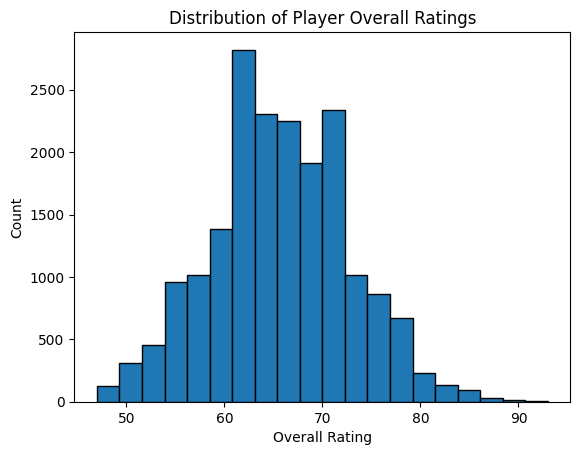

In [177]:
# Summary statistics for players_21_filtered
summary = players_21_filtered.describe()

# Distribution of 'overall' ratings
plt.hist(players_21_filtered['overall'], bins=20, edgecolor='k')
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()


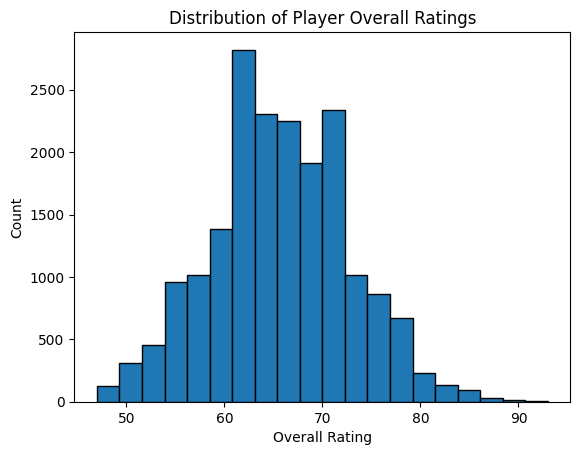

In [178]:
#Summary statistics
summary = players_21.describe()

#Distribution of 'overall' ratings
plt.hist(players_21['overall'], bins=20, edgecolor='k')
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()


In [179]:
# Impute missing values for numeric columns with the median
numeric_columns = players_21_filtered.select_dtypes(include='number')
players_21_filtered[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

# Impute missing values for categorical columns with the mode
categorical_columns = players_21_filtered.select_dtypes(exclude='number')
players_21_filtered[categorical_columns.columns] = categorical_columns.fillna(categorical_columns.mode().iloc[0])
(players_21_filtered)


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_name,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,103500000.0,560000.0,33,170,72,241.0,Spain Primera Division,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,92,92,63000000.0,220000.0,35,187,83,45.0,Italian Serie A,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,91,91,111000000.0,240000.0,31,184,80,21.0,German 1. Bundesliga,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,91,91,132000000.0,270000.0,28,175,68,73.0,French Ligue 1,1.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,91,91,129000000.0,370000.0,29,181,70,10.0,English Premier League,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47,52,70000.0,1000.0,21,177,70,112165.0,Chinese Super League,1.0,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,15+2
18940,47,53,70000.0,1000.0,21,174,68,112540.0,Chinese Super League,1.0,...,48+2,48+2,48+2,47+2,47+2,46+2,46+2,46+2,47+2,15+2
18941,47,47,45000.0,2000.0,28,185,79,111774.0,Chinese Super League,1.0,...,47,47,47,47,47,46+1,46+1,46+1,47,11+2
18942,47,67,130000.0,500.0,17,171,58,1920.0,English League Two,4.0,...,32+2,32+2,32+2,35+2,33+2,26+2,26+2,26+2,33+2,14+2


In [180]:
# Impute missing values for numeric columns with the median
numeric_columns = players_22_filtered.select_dtypes(include='number')
players_22_filtered[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

# Impute missing values for categorical columns with the mode
categorical_columns = players_22_filtered.select_dtypes(exclude='number')
players_22_filtered[categorical_columns.columns] = categorical_columns.fillna(categorical_columns.mode().iloc[0])
(players_22_filtered)


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_name,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,78000000.0,320000.0,34,170,72,73.0,French Ligue 1,1.0,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,92,92,119500000.0,270000.0,32,185,81,21.0,German 1. Bundesliga,1.0,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,91,91,45000000.0,270000.0,36,187,83,11.0,English Premier League,1.0,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,91,91,129000000.0,270000.0,29,175,68,73.0,French Ligue 1,1.0,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,91,91,125500000.0,350000.0,30,181,70,10.0,English Premier League,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,180,64,112541.0,Chinese Super League,1.0,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
19235,47,59,110000.0,500.0,19,175,70,445.0,Rep. Ireland Airtricity League,1.0,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
19236,47,55,100000.0,500.0,21,178,72,111131.0,Rep. Ireland Airtricity League,1.0,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2
19237,47,60,110000.0,500.0,19,173,66,111131.0,Rep. Ireland Airtricity League,1.0,...,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2


In [181]:
# One-hot encoding for 'club_position'
players_21_filtered = pd.get_dummies(players_21_filtered, columns=['club_position'], prefix='position')

# Label encoding for 'preferred_foot'
players_21_filtered['preferred_foot'] = players_21_filtered['preferred_foot'].map({'Right': 0, 'Left': 1})

# Label encoding for 'work_rate'
players_21_filtered['work_rate'] = players_21_filtered['work_rate'].astype('category').cat.codes

# Print the transformed DataFrame
players_21_filtered


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_name,league_level,...,position_RCM,position_RDM,position_RES,position_RF,position_RM,position_RS,position_RW,position_RWB,position_ST,position_SUB
0,93,93,103500000.0,560000.0,33,170,72,241.0,Spain Primera Division,1.0,...,0,0,0,0,0,0,0,0,0,0
1,92,92,63000000.0,220000.0,35,187,83,45.0,Italian Serie A,1.0,...,0,0,0,0,0,0,0,0,0,0
2,91,91,111000000.0,240000.0,31,184,80,21.0,German 1. Bundesliga,1.0,...,0,0,0,0,0,0,0,0,1,0
3,91,91,132000000.0,270000.0,28,175,68,73.0,French Ligue 1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,91,91,129000000.0,370000.0,29,181,70,10.0,English Premier League,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47,52,70000.0,1000.0,21,177,70,112165.0,Chinese Super League,1.0,...,0,0,0,0,0,0,0,0,0,1
18940,47,53,70000.0,1000.0,21,174,68,112540.0,Chinese Super League,1.0,...,0,0,1,0,0,0,0,0,0,0
18941,47,47,45000.0,2000.0,28,185,79,111774.0,Chinese Super League,1.0,...,0,0,1,0,0,0,0,0,0,0
18942,47,67,130000.0,500.0,17,171,58,1920.0,English League Two,4.0,...,0,0,0,0,0,0,0,0,0,1


In [182]:
# One-hot encoding for 'club_position'
players_22_filtered = pd.get_dummies(players_22_filtered, columns=['club_position'], prefix='position')

# Label encoding for 'preferred_foot'
players_22_filtered['preferred_foot'] = players_22_filtered['preferred_foot'].map({'Right': 0, 'Left': 1})

# Label encoding for 'work_rate'
players_22_filtered['work_rate'] = players_22_filtered['work_rate'].astype('category').cat.codes

# Print the transformed DataFrame
players_22_filtered


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_name,league_level,...,position_RCM,position_RDM,position_RES,position_RF,position_RM,position_RS,position_RW,position_RWB,position_ST,position_SUB
0,93,93,78000000.0,320000.0,34,170,72,73.0,French Ligue 1,1.0,...,0,0,0,0,0,0,1,0,0,0
1,92,92,119500000.0,270000.0,32,185,81,21.0,German 1. Bundesliga,1.0,...,0,0,0,0,0,0,0,0,1,0
2,91,91,45000000.0,270000.0,36,187,83,11.0,English Premier League,1.0,...,0,0,0,0,0,0,0,0,1,0
3,91,91,129000000.0,270000.0,29,175,68,73.0,French Ligue 1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,91,91,125500000.0,350000.0,30,181,70,10.0,English Premier League,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,180,64,112541.0,Chinese Super League,1.0,...,0,0,0,0,0,0,0,0,0,1
19235,47,59,110000.0,500.0,19,175,70,445.0,Rep. Ireland Airtricity League,1.0,...,0,0,1,0,0,0,0,0,0,0
19236,47,55,100000.0,500.0,21,178,72,111131.0,Rep. Ireland Airtricity League,1.0,...,0,0,1,0,0,0,0,0,0,0
19237,47,60,110000.0,500.0,19,173,66,111131.0,Rep. Ireland Airtricity League,1.0,...,0,0,1,0,0,0,0,0,0,0


**QUESTION 2**

**Create feature subsets that show maximum correlation with the dependent variable.**

*Created feature subsets which show better correlation with the overall rating and scaled the independent variables.*

Feature Engineering- Creating feature subsets and finding the maximum correlation

In [183]:
# Calculate the correlation matrix (for players_22 dataset)
correlation_matrix_21 = players_21_filtered.corr()

# Number of top features to select
N = 20

# Getting the top N features with the highest absolute correlation with 'overall'
top_correlated_features = correlation_matrix_21['overall'].abs().nlargest(N + 1).index

# Remove 'overall' from the list of top correlated features
top_correlated_features = top_correlated_features.drop('overall')

# Creating a feature subset with the selected top features (the independent variables)
feature_subset_21 = players_21_filtered[top_correlated_features]

# Define the dependent variable
dependent_variable_21 = players_21_filtered['overall']


<ipython-input-183-87e513278266>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_21 = players_21_filtered.corr()


In [184]:
# Display the first few rows of feature_subset_21
feature_subset_21


,movement_reactions,mentality_composure,passing,potential,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,mentality_vision,attacking_short_passing,physic,skill_long_passing,age,shooting,skill_ball_control,international_reputation,skill_curve,attacking_crossing,power_long_shots
0,94,96,91.0,93,138400000.0,95.0,560000.0,86,103500000.0,95,91,65.0,91,33,92.0,96,5,93,85,94
1,95,95,81.0,92,75900000.0,89.0,220000.0,94,63000000.0,82,82,77.0,77,35,93.0,92,5,81,84,93
2,93,88,78.0,91,132000000.0,85.0,240000.0,89,111000000.0,79,84,82.0,70,31,91.0,88,4,79,71,85
3,91,93,86.0,91,166500000.0,94.0,270000.0,80,132000000.0,90,87,59.0,81,28,85.0,95,5,88,85,84
4,91,91,93.0,91,161000000.0,88.0,370000.0,91,129000000.0,94,94,78.0,93,29,86.0,92,4,85,94,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,48,40,26.0,52,57000.0,27.0,1000.0,35,70000.0,25,31,48.0,25,21,23.0,24,1,21,23,23
18940,50,35,49.0,53,72000.0,47.0,1000.0,38,70000.0,53,55,48.0,50,21,32.0,45,1,36,38,29
18941,44,35,49.0,47,47000.0,46.0,2000.0,49,45000.0,44,56,59.0,56,28,37.0,43,1,37,44,34
18942,53,45,40.0,67,165000.0,53.0,500.0,50,130000.0,49,45,40.0,37,17,46.0,44,1,43,27,41


In [185]:
dependent_variable_21

0        93
1        92
2        91
3        91
4        91
         ..
18939    47
18940    47
18941    47
18942    47
18943    47
Name: overall, Length: 18944, dtype: int64

In [186]:
# Calculate the correlation matrix (for players_22 dataset)
correlation_matrix_22 = players_22_filtered.corr()

# Number of top features to select
N = 20

# Getting the top N features with the highest absolute correlation with 'overall'
top_correlated_features = correlation_matrix_22['overall'].abs().nlargest(N + 1).index

# Remove 'overall' from the list of top correlated features
top_correlated_features = top_correlated_features.drop('overall')

# Creating a feature subset with the selected top features (the independent variables)
feature_subset_22 = players_22_filtered[top_correlated_features]

# Define the dependent variable
dependent_variable_22 = players_22_filtered['overall']


<ipython-input-186-a0993249c15d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_22 = players_22_filtered.corr()


In [187]:
feature_subset_22

,movement_reactions,mentality_composure,passing,potential,dribbling,wage_eur,power_shot_power,value_eur,release_clause_eur,mentality_vision,attacking_short_passing,skill_long_passing,physic,international_reputation,skill_ball_control,age,shooting,skill_curve,power_long_shots,attacking_crossing
0,94,96,91.0,93,95.0,320000.0,86,78000000.0,144300000.0,95,91,91,65.0,5,96,34,92.0,93,94,85
1,93,88,79.0,92,86.0,270000.0,90,119500000.0,197200000.0,81,85,70,82.0,5,88,32,92.0,79,87,71
2,94,95,80.0,91,88.0,270000.0,94,45000000.0,83300000.0,76,80,77,75.0,5,88,36,94.0,81,93,87
3,89,93,86.0,91,94.0,270000.0,80,129000000.0,238700000.0,90,86,81,63.0,5,95,29,83.0,88,81,85
4,91,89,93.0,91,88.0,350000.0,91,125500000.0,232200000.0,94,94,93,78.0,4,91,30,86.0,85,91,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,53,37,46.0,52,48.0,1000.0,46,70000.0,114000.0,43,50,48,49.0,1,49,22,35.0,33,30,46
19235,49,47,50.0,59,46.0,500.0,49,110000.0,193000.0,49,51,50,51.0,1,42,19,39.0,53,38,54
19236,46,36,45.0,55,49.0,500.0,50,100000.0,175000.0,46,49,49,52.0,1,49,21,37.0,37,34,39
19237,48,47,36.0,60,48.0,500.0,48,110000.0,239000.0,40,38,33,42.0,1,45,19,46.0,36,41,29


In [188]:
dependent_variable_22

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64

In [189]:
#Scaling independent variables
columns_to_scale = [ 'movement_reactions', 'mentality_composure', 'passing', 'potential',
                    'release_clause_eur', 'dribbling', 'wage_eur', 'power_shot_power', 'value_eur',
                    'mentality_vision', 'attacking_short_passing', 'physic', 'skill_long_passing', 'age',
                    'shooting', 'skill_ball_control', 'international_reputation', 'skill_curve', 'attacking_crossing']

scaled_data = feature_subset_21[columns_to_scale]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
scaled_data = scaler.fit_transform(scaled_data)


  # Replace the original columns with the scaled data in the DataFrame
feature_subset_21[columns_to_scale] = scaled_data


<ipython-input-189-b45e54f72093>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_subset_21[columns_to_scale] = scaled_data


**QUESTION 3**

**Create and train a suitable machine learning model with cross-validation that can predict a player's rating.**

*Created and trained with cross-validation either RandomForest, XGBoost, Gradient Boost Regressors that can predict a player rating.*

In [190]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_subset_21, players_21_filtered['overall'], test_size=0.2, random_state=42)


# Train a Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest MSE:", rf_mse)
print("Random Forest R-squared:", rf_r2)

Random Forest MSE: 0.22128493006070202
Random Forest R-squared: 0.9953052922140556


In [191]:
# Train an XGBoost Regressor
xgboost = XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)
xgb_predictions = xgboost.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost MSE:", xgb_mse)
print("XGBoost R-squared:", xgb_r2)

XGBoost MSE: 0.24966320200894543
XGBoost R-squared: 0.9947032281953693


In [192]:
# Train a Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)
gb_predictions = gradient_boosting.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting R-squared:", gb_r2)

Gradient Boosting MSE: 0.6656977747532009
Gradient Boosting R-squared: 0.9858767764919083


**Question 4**

**Measure the model's performance and fine-tune it as a process of optimization.**

*Used MAE or RMSE and then fine tuned model, train and tested it again.*

In [194]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

print("Random Forest MAE:", rf_mae)
print("XGBoost MAE:", xgb_mae)
print("Gradient Boosting MAE:", gb_mae)

Random Forest MAE: 0.2729955133280551
XGBoost MAE: 0.3514245859580545
Gradient Boosting MAE: 0.5979522560796027


In [ ]:
# Define parameter grids for hyperparameter tuning
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
xgb_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}
gb_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}

In [195]:
# Hyperparameter tuning for each model
# Random Forest
rf_grid_search = GridSearchCV(random_forest, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
print("Best Random Forest MAE:", best_rf_mae)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Random Forest MAE: 0.27036597167238463


In [196]:
# XGBoost
xgb_grid_search = GridSearchCV(xgboost, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_predictions = best_xgb_model.predict(X_test)
best_xgb_mae = mean_absolute_error(y_test, best_xgb_predictions)
print("Best XGBoost MAE:", best_xgb_mae)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best XGBoost MAE: 0.35190394711890866


In [197]:
# Gradient Boosting
gb_grid_search = GridSearchCV(gradient_boosting, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
best_gb_predictions = best_gb_model.predict(X_test)
best_gb_mae = mean_absolute_error(y_test, best_gb_predictions)
print("Best Gradient Boosting MAE:", best_gb_mae)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Gradient Boosting MAE: 0.33879181172406325


In [198]:
# Creating an ensemble model using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('RandomForest', best_rf_model),
    ('XGBoost', best_xgb_model),
    ('GradientBoosting', best_gb_model)
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_subset_21, players_21_filtered['overall'], test_size=0.2, random_state=42)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Making predictions with the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate the mean absolute error for the ensemble model
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)

print("Ensemble Model Mean Absolute Error:", ensemble_mae)


Ensemble Model Mean Absolute Error: 0.2931491652662453


**Question 5**


**Use the data from another season(players_22) which was not used during the training to test how good is the model.**


*Used the data(players_22) to test how good is the model with completely new data.*

In [200]:
#Testing with the gradient boosting model
predictions_players_22 = best_rf_model.predict(X_test)

players_22_mae = mean_absolute_error(y_test,predictions_players_22)
print("MAE on players_22 dataset:", players_22_mae)

MAE on players_22 dataset: 0.27036597167238463


In [201]:
from sklearn.ensemble import VotingRegressor

# Create an ensemble model using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('RandomForest', best_rf_model),
    ('XGBoost', best_xgb_model),
    ('GradientBoosting', best_gb_model)
])

# Fit the ensemble model on the training data (X_train, y_train)
ensemble_model.fit(X_train, y_train)

# Use the ensemble model to predict player ratings for players_22 (X_test)
ensemble_predictions_players_22 = ensemble_model.predict(X_test)

# Calculate the mean absolute error for the ensemble model on players_22 (y_test)
ensemble_players_22_mae = mean_absolute_error(y_test, ensemble_predictions_players_22)

print("MAE on players_22 dataset using Ensemble Model:", ensemble_players_22_mae)


MAE on players_22 dataset using Ensemble Model: 0.2931491652662453


In [206]:
import pickle
import joblib

# Save the model using joblib
joblib.dump(best_rf_model, 'FIFA_football_prediction_model.pkl')


['FIFA_football_prediction_model.pkl']